<a href="https://colab.research.google.com/github/saishree2004/Machine-learning/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first two features for 2D plotting
y = iris.target
feature_names = iris.feature_names[:2]
target_names = iris.target_names


In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7555555555555555


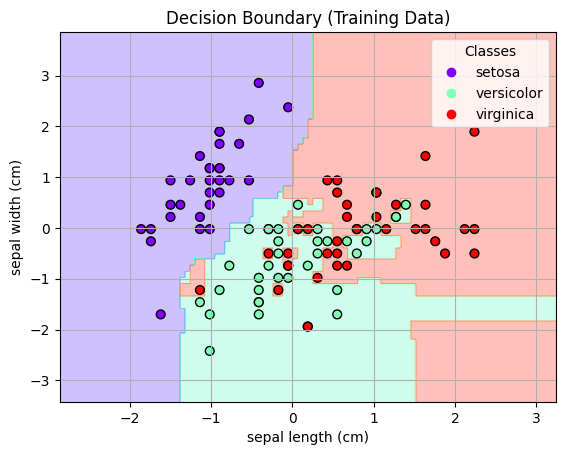

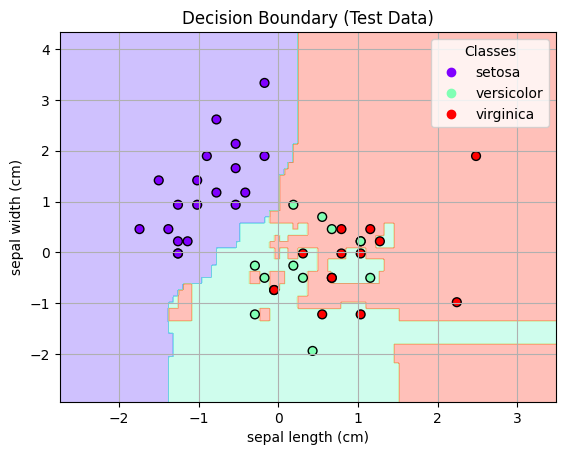

In [6]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Flatten grid and predict
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.rainbow)
    handles, _ = scatter.legend_elements()
    plt.legend(handles, target_names, title="Classes")

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot decision boundary on training data
plot_decision_boundary(model, X_train, y_train, "Decision Boundary (Training Data)")

# Plot decision boundary on test data
plot_decision_boundary(model, X_test, y_test, "Decision Boundary (Test Data)")
